# Machine Learning Lab 1.2 - Naive Bayes Pt 2

Edit the following to include the names of everyone in your group including you, or if you are not in a group 
- **Student Names:** Steven Mabasa, Matimu khosa, Takudzwa Timothy Mhizha
- **Student Numbers:** 2717404, 2716924, 2742390

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Section 1 - Digit Classification with Naive Bayes

## Data Processing
**Do not change the below cells, but you must run them**


Load data into pandas dataframe object

In [70]:
# Load data (digits) & labels as pandas dataframe object
df = pd.read_csv("smalldigits.csv", header=None)
df = df.sample(frac=1, random_state=42, axis=0)  # Randomise dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1245,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,6
220,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,9
1518,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
438,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,7
1270,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
1294,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,7
860,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,2
1459,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,7


Create 90/10 train test split and convert to numpy arrays

In [71]:
n_rows = df.shape[0]
# Roughly 90/10 train-test split
train_digits = df.iloc[:int(n_rows * 0.9), :-1].to_numpy()
train_labels = df.iloc[:int(n_rows * 0.9), -1].to_numpy()

print("train_digits: \n", train_digits)
print("\ntrain_labels: \n", train_labels)

train_digits: 
 [[0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]]

train_labels: 
 [6 9 3 ... 8 0 4]


In [72]:
test_digits = df.iloc[int(n_rows * 0.9):, :-1].to_numpy()
test_labels = df.iloc[int(n_rows * 0.9):, -1].to_numpy()

print("test_digits: \n", test_digits)
print("\ntest_labels: \n", test_labels)

test_digits: 
 [[0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

test_labels: 
 [9 5 0 5 3 6 9 1 1 8 4 0 9 2 6 9 8 6 8 7 1 5 7 2 8 0 8 8 6 7 0 9 3 8 2 0 2
 1 7 4 3 1 4 2 8 2 5 3 8 5 5 5 8 1 5 3 1 1 9 1 4 4 4 3 5 6 8 2 5 7 5 1 5 7
 9 9 2 7 1 9 0 9 3 7 5 9 0 3 5 1 1 5 0 0 5 0 4 1 2 2 6 8 8 0 3 4 3 3 8 4 0
 6 0 2 3 3 2 1 0 0 4 0 0 1 8 2 0 4 1 5 6 8 0 3 9 8 2 8 4 0 6 4 1 0 0 1 2 9
 7 0 8 6 3 9 2 4 4 8 3 8 0 0 6 8 5 4 6 5 7 1 4 4 5 2 4 3 7 2 7 1]


**Note:**
- `train_digits` - train features
- `train_labels` - train labels
- `test_digits` - test features
- `test_labels` - test labels

### Helper Functions

`vis_digit` can be used to visualise a given digit. This may be useful for debugging and/or your understanding.

Label = 6


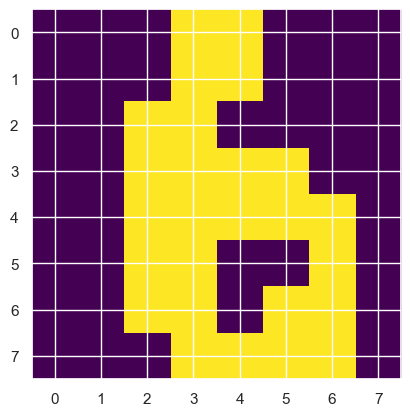

In [73]:
def vis_digit(digit):
    plt.imshow(digit.reshape(8, 8), cmap="viridis")

print(f"Label = {train_labels[0]}")
vis_digit(train_digits[0])

## Learning

#### Question 1
Compute the **prior** probabilities for each class. These values should be stored in the numpy array `priors`, with the prior for label 0 being at index 0 of the `priors`, label 1 being at index 1 and so on.

In [74]:
priors = np.zeros(10)
# TODO
n = len(train_labels)
for lab in range(0,10):
    lcount=0;
    for i in range(0,n):
        if train_labels[i]==lab:
            lcount +=1
    prior=lcount/n
    priors[lab]=prior
priors



array([0.09461967, 0.0995671 , 0.09833024, 0.10265925, 0.10018553,
       0.10018553, 0.10451453, 0.10327767, 0.09400124, 0.10265925])

#### Question 2 
Compute the class conditionals with Laplacian smoothing and and assign their values to the numpy array `class_conditionals`. Set `k = 1`.

In [75]:
class_conditionals = np.zeros((10, 64))  # 10 classes, 64 features
k = 1
for num in range(0,10):
    total = 0
    for i in test_labels:
        if i==num:
            total +=1
    for pixel in range(0,64):
        to_pixe=0
        n = len(test_labels)
        for label in range(0,n):
            if test_labels[label]==num:
                if test_digits[label][pixel]==1:
                    to_pixe +=1
        if to_pixe !=0:
            class_conditionals[num,pixel] = to_pixe/total
        else:
             class_conditionals[num,pixel] = (to_pixe+1)/(total+64)
            
# TODO

class_conditionals[:2]

array([[0.01123596, 0.01123596, 0.4       , 1.        , 0.96      ,
        0.32      , 0.01123596, 0.01123596, 0.01123596, 0.01123596,
        0.92      , 1.        , 0.92      , 0.96      , 0.04      ,
        0.01123596, 0.01123596, 0.24      , 1.        , 0.6       ,
        0.2       , 0.96      , 0.36      , 0.01123596, 0.01123596,
        0.4       , 0.96      , 0.2       , 0.01123596, 0.84      ,
        0.92      , 0.01123596, 0.01123596, 0.6       , 0.96      ,
        0.08      , 0.01123596, 0.84      , 0.88      , 0.01123596,
        0.01123596, 0.32      , 1.        , 0.12      , 0.04      ,
        0.96      , 0.76      , 0.01123596, 0.01123596, 0.04      ,
        1.        , 0.84      , 0.88      , 1.        , 0.16      ,
        0.01123596, 0.01123596, 0.01123596, 0.4       , 1.        ,
        1.        , 0.6       , 0.01123596, 0.01123596],
       [0.01176471, 0.01176471, 0.14285714, 0.57142857, 1.        ,
        0.66666667, 0.19047619, 0.01176471, 0.01176471, 0.0

##### Visualise class conditionals 
Below, for each class we are plotting the associated probabilities of each pixel (i.e. features). If your computation of the class conditionals is correct then the plots below should vaguelly look like the associated label.

Think about why visualising the class conditional model in this way shows the associated labels.

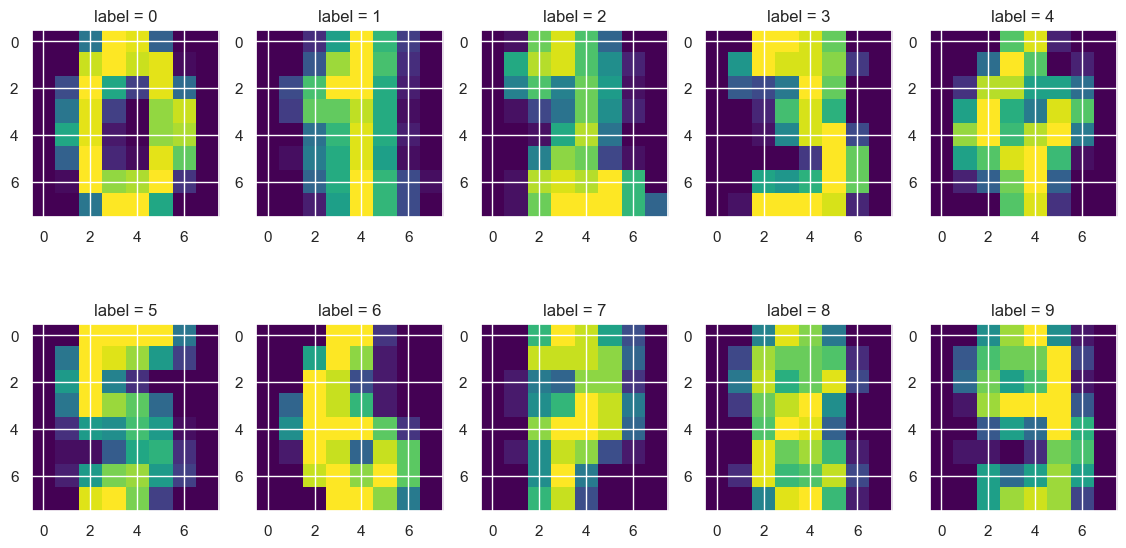

In [76]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 5, figsize=(14, 7))  # 1 row, 2 columns
for i in range(5):
    axes[0][i].imshow(class_conditionals[i].reshape(8, 8), cmap="viridis")
    axes[0][i].set_title(f"label = {i}")

for i in range(5):
    axes[1][i].imshow(class_conditionals[i+5].reshape(8, 8), cmap="viridis")
    axes[1][i].set_title(f"label = {i+5}")

## Inference

#### Question 3
Finish the function `calc_posterior` that computes $P(C|X)$, where $C$=`label` and $X$=`features`.
- `features`: $x$

In [77]:
import numpy as np

def calc_posterior(features):
    # Calc P(X|C) for each C    
    feat_class_conds_log = np.zeros(10)
    for la in range(0, 10):
        for pix in range(0, 64):
            if features[pix] == 1:
                feat_class_conds_log[la] += np.log(class_conditionals[la, pix] + 1e-10)
            else:
                feat_class_conds_log[la] += np.log(1 - class_conditionals[la, pix] + 1e-10)
    
    log_p_x = np.log(np.sum(np.exp(feat_class_conds_log + np.log(priors + 1e-10))))

    log_p_c_x = feat_class_conds_log + np.log(priors + 1e-10) - log_p_x

    # Convert back from log-space to normal space for output
    p_c_x = np.exp(log_p_c_x)

    return p_c_x

print(f"Posterior probs for digit = {calc_posterior(test_digits[0])}")


Posterior probs for digit = [1.36443255e-23 4.23376408e-38 9.67024050e-20 6.61502895e-16
 7.47023046e-41 3.17206984e-17 8.14688202e-59 4.78706463e-27
 2.38624577e-09 9.99999998e-01]


test_digits[0]:


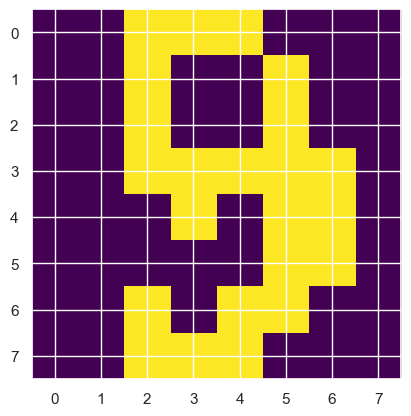

In [78]:
print("test_digits[0]:")
vis_digit(test_digits[0])

#### Question 4

Finish the function `infer_class` that infers/predicts the most probable class for the given data `digit`.

In [79]:
def infer_class(digit):
    p_c_xs=calc_posterior(digit)
    pred_label = np.argmax(p_c_xs)
    
    return pred_label

infer_ind = 0
print(f"Predicted label = {infer_class(test_digits[infer_ind])}; True label = {test_labels[infer_ind]}")

Predicted label = 9; True label = 9


test_digits[0]:


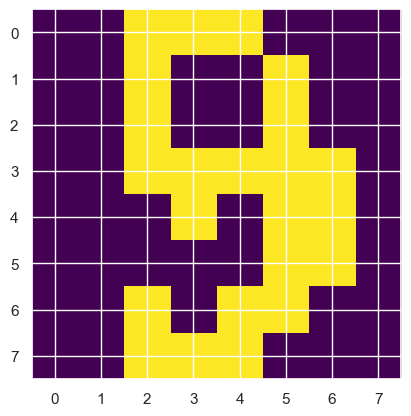

In [80]:
print(f"test_digits[{infer_ind}]:")
vis_digit(test_digits[infer_ind])

#### Question 5
Create a confusion matrix using the test set

[[25.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 17.  1.  0.  0.  0.  0.  1.  1.  2.]
 [ 0.  0. 17.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 17.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 19.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 20.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. 12.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0. 20.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]]


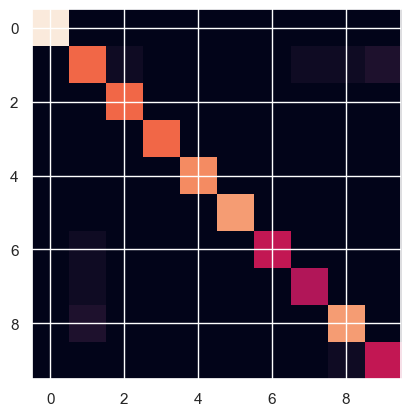

In [81]:
confusion_matrix = np.zeros((10, 10))
totalTest = len(test_digits)
for i in range(0,totalTest):
    preLab = infer_class(test_digits[i])
    trueLab = test_labels[i]
    confusion_matrix[preLab][trueLab] +=1
# TODO

# Don't modify
print(confusion_matrix)
plt.imshow(confusion_matrix)  # Plot heatmap of confusion_matrix

#### Question 6
Compute the accuracy

In [82]:
acc = 0
for i in range(0,10):
    acc += confusion_matrix[i][i] 
acc = acc/totalTest
print(f"Accuracy = {acc}")

Accuracy = 0.9444444444444444


# Section 2 - Naive Bayes with Continuous Features

The file `banknote_authentication.csv` contains 100 examples of genuine (class=1) and forged (class=0) banknotes. These images were analysed with a wavelet transform tool that generated four continuous features: variance, skewness, curtosis and entropy (of each image). For each feature in both classes, you must fit a Gaussian distribution to that feature and use this to make the predictions.

In [83]:
bank_df = pd.read_csv("banknote_authentication.csv", sep=";")
bank_df = bank_df.sample(frac=1, random_state=42)  # Randomise
bank_df

,variance,skewness,curtosis,entropy,class
83,0.50813,0.47799,-1.980400,0.57714,1
53,-3.84830,-12.80470,15.682400,-1.28100,1
70,-0.34810,-0.38696,-0.478410,0.62627,1
45,-0.78690,9.56630,-3.786700,-7.50340,0
44,2.85610,6.91760,-0.793720,0.48403,0
...,...,...,...,...,...
60,-2.41150,-9.13590,9.344400,-0.65259,1
71,0.47368,3.36050,-4.506400,-4.04310,1
14,3.40400,8.72610,-2.991500,-0.57242,0
92,-0.28015,3.07290,-3.385700,-2.91550,1


## Data Analysis & Visualisation

### Question 1
**a)**
Plot 8 seperate histograms: one for each variable for each class. These plots must be rendered in the provided matlotlib axes (`axs`). The top row should correspond to `class=0` and the bottom row should correspond to `class=1`. For each plot you must set the title of the axis to have the format `class={class}-{feature_name}`. Incorrect formating will lead to zero marks for this question.

**Tip:** I'd recommend using the plotting library [Seaborn](https://seaborn.pydata.org/index.html) for this as it will make things easier, but you are also welcome to just use matplotlib directly. 

In [84]:
# If using seaborn uncomment the below and run
!pip install seaborn
import seaborn as sns
sns.set()

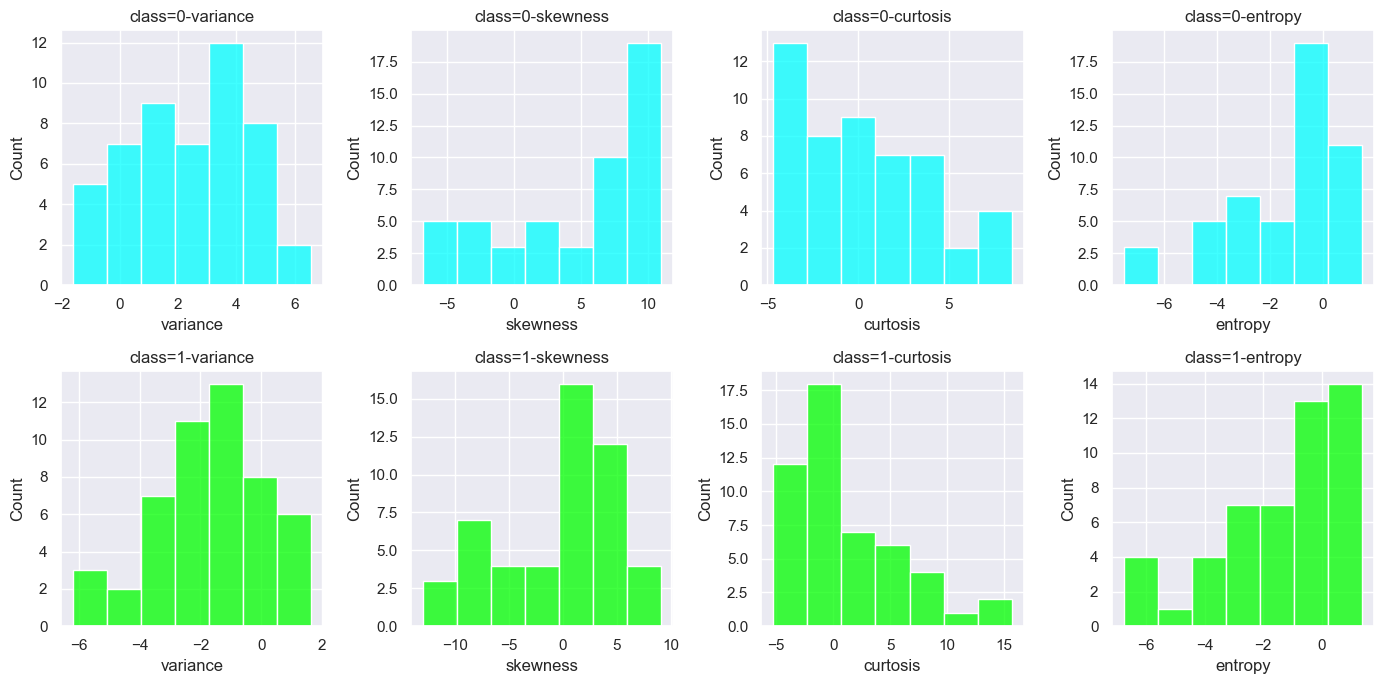

In [85]:
features = bank_df.columns[:-1]

fig, axs = plt.subplots(2, 4, figsize=(14, 7))  # Don't remove
axs = axs.flatten()

for idx, feature in enumerate(features):
    sns.histplot(bank_df[bank_df['class'] == 0], x=feature, kde=False, ax=axs[idx], color='cyan')
    axs[idx].set_title(f'class=0-{feature}')
    
    sns.histplot(bank_df[bank_df['class'] == 1], x=feature, kde=False, ax=axs[idx+4], color='lime')
    axs[idx+4].set_title(f'class=1-{feature}')

fig.tight_layout()  # Don't remove



**b)** Do these distributions look like Gaussian distributions? How well do you expect this to work?

*This is a Markdown Cell. Double click this text to edit.*

Put your answer below:
Yes the distributions resemble Gaussian distributions, I expect this to work well
...

## Training

#### Train-Test Split

First create an 80-20 train-test split. Note that we first randomised the dataframe so the data is already randomised.

In [86]:
split_index = int(bank_df.shape[0] * 0.8)

print("#########")
print("# TRAIN #")
print("#########")
s2_train_features = bank_df.iloc[:split_index, :-1].to_numpy()
s2_train_labels = bank_df.iloc[:split_index, -1].to_numpy()

print(f"first ten rows of s2_train_features = \n {s2_train_features[:10]}")
print(f"\nfirst ten elements of s2_train_labels = \n {s2_train_labels[:10]}")

print("\n########")
print("# TEST #")
print("########")
s2_test_features = bank_df.iloc[split_index:, :-1].to_numpy()
s2_test_labels = bank_df.iloc[split_index:, -1].to_numpy()

print(f"first ten rows of s2_test_features = \n {s2_test_features[:10]}")
print(f"\nfirst ten elements of s2_test_labels = \n {s2_test_labels[:10]}")

#########
# TRAIN #
#########
first ten rows of s2_train_features = 
 [[  0.50813   0.47799  -1.9804    0.57714]
 [ -3.8483  -12.8047   15.6824   -1.281  ]
 [ -0.3481   -0.38696  -0.47841   0.62627]
 [ -0.7869    9.5663   -3.7867   -7.5034 ]
 [  2.8561    6.9176   -0.79372   0.48403]
 [  3.4805    9.7008   -3.7541   -3.4379 ]
 [  3.9362   10.1622   -3.8235   -4.0172 ]
 [ -2.7338    0.45523   2.4391    0.21766]
 [  1.2247    8.7779   -2.2135   -0.80647]
 [  3.6216    8.6661   -2.8073   -0.44699]]

first ten elements of s2_train_labels = 
 [1 1 1 0 0 0 0 1 0 0]

########
# TEST #
########
first ten rows of s2_test_features = 
 [[-0.36506  2.8928  -3.6461  -3.0603 ]
 [ 1.6408   4.2503  -4.9023  -2.6621 ]
 [ 3.6289   0.81322  1.6277   0.77627]
 [ 4.8906  -3.3584   3.4202   1.0905 ]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [-1.6677  -7.1535   7.8929   0.96765]
 [ 0.3292  -4.4552   4.5718  -0.9888 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 0.93584  8.8855  -1.6831  -1.6599 ]
 [-3.2238   2.79

**Note: If you do not train only on the training data you will lose significant marks or get zero for the preceeding questions.**

### Question 2 - Priors
Calculate the class priors and set them to the numpy array `s2_priors`. Element 0 of the array should correspond to class=0.

In [87]:
s2_priors = np.zeros(2)
forged_total = 0
real_total = 0
n = len(s2_train_labels)
for i in range(0,n):
    if s2_train_labels[i]==0:
        forged_total +=1
        s2_priors[0] +=1
    else:
        s2_priors[1]+=1
        real_total +=1
s2_priors = s2_priors/n
#TODO
s2_priors

array([0.525, 0.475])

### Question 3 - Class Conditionals
For each feature $x_i$ and class $c$ fit a gaussian distribution to the associated data and implement the function `s2_class_conditional_fn`. Note that you **must** implement the relevant equations yourself - do not just use in built methods for computing the mean, variance and what not.

**TIP:** Use the relevant equations found in the lecture notes "Lec 1.2 - More on Naive Bayes". 

**a)** Fit gaussian distributions to each feature and class $(x_i, c)$. I.e., compute the mean ($\mu_{x_i, c}$) and variance ($\sigma^2_{x_i, c}$) for each $(x_i, c)$. Store these values in the numpy arrays `s2_cc_mean` for the means, and `s2_cc_var` for the variance. The rows of these arrays must correspond to features, and the columns must correspond to classes. Note: $x_0$="variance", $x_1$="skewness", $x_2$="curtosis" and $x_3$="entropy". $c_0$=0 and $c_1$=1.

The format of `s2_cc_mean` is as follows:
`s2_cc_mean` = </br>
\[ </br>
&emsp; \[$\mu_{x_0, c_0}$, $\mu_{x_1, c_0}$, $\mu_{x_2, c_0}$, $\mu_{x_3, c_0}$],</br>
&emsp; \[$\mu_{x_0, c_1}$, $\mu_{x_1, c_1}$, $\mu_{x_2, c_1}$, $\mu_{x_3, c_1}$] </br>
]

The format of `s2_cc_var` follows similarly. 

In [88]:
s2_cc_mean = np.zeros((2, 4))
for feature in range(0,4):
    for data in range(0,n):
        if s2_train_labels[data]==0:
            s2_cc_mean[0,feature]+= s2_train_features[data,feature]
        else:
            s2_cc_mean[1,feature]+= s2_train_features[data,feature]
for i in range(0,2):
    for j in range(0,4):
        if i==0:
            s2_cc_mean[i,j] = s2_cc_mean[i,j]/forged_total
        else:
             s2_cc_mean[i,j] = s2_cc_mean[i,j]/real_total
# TODO

s2_cc_mean

array([[ 2.11768924,  5.20368119,  0.34544714, -1.74017955],
       [-1.82843   , -0.68951058,  1.54479248, -1.21049189]])

In [89]:
s2_cc_var = np.zeros((2,4))
for feature in range(0,4):
    for data in range(0,n):
        if s2_train_labels[data]==0:
            s2_cc_var[0,feature]+= (s2_train_features[data,feature]-s2_cc_mean[0,feature])**2
        else:
            s2_cc_var[1,feature]+= (s2_train_features[data,feature]-s2_cc_mean[1,feature])**2
for i in range(0,2):
    for j in range(0,4):
        if i==0:
            s2_cc_var[i,j] = s2_cc_var[i,j]/forged_total
        else:
             s2_cc_var[i,j] = s2_cc_var[i,j]/real_total
# TODO

s2_cc_var

array([[ 4.02932591, 26.38644283, 15.08515814,  5.05878121],
       [ 3.16089597, 28.14452811, 22.27090384,  4.84683954]])

**b)** Implement the function `s2_class_conditional_fn` which will compute $P(x_i | c)$. This function takes in the feature, class (class_label), mean and variance (var).
- `feature`: $x_i$
- `class_label`: $c$
- `mean`: mean ($\mu_{x_i, c}$) of associated gaussian distribution for $(x_i, c)$
- `var`: variance ($\sigma^2_{x_i, c}$) of associated gaussian distribution for $(x_i, c)$

In [90]:
def s2_class_conditional_fn(feature, class_label, mean, var):

    
    coefficient = 1 / np.sqrt(2 * np.pi * var)
    exponent = np.exp(-0.5 * ((feature - mean) ** 2) / var)
    
    cond_prob = coefficient * exponent
    return cond_prob

tmp_feature = s2_train_features[0, 0]
# tmp_class = 0
print(f"P(x_0={tmp_feature}|c={0}) = {s2_class_conditional_fn(tmp_feature, 0, s2_cc_mean[0, 0], s2_cc_var[0, 0])}")
print(f"P(x_0={tmp_feature}|c={1}) = {s2_class_conditional_fn(tmp_feature, 1, s2_cc_mean[0, 1], s2_cc_var[0, 1])}")


P(x_0=0.50813|c=0) = 0.14410453742602167
P(x_0=0.50813|c=1) = 0.051141559173017714


### Question 4 - Posterior Probability

Implement the function `s2_calc_posterior` that calculates the posterior probability of a given class based off given data. I.e. it should compute $P(c|x)$.
- `feature`: $x$
- `class_label`: $c$

In [91]:
def s2_calc_posterior(class_label, feature):
    post_prob = 1
    p_x_c1 = 1
    p_x_c0 = 1

    for feat in range(0,4):
        vvar1 = s2_cc_var[1,feat]
        me1 = s2_cc_mean[1,feat]
        ccf1 = s2_class_conditional_fn(feature[feat],1,me1,vvar1)
        vvar0 = s2_cc_var[0,feat]
        me0 = s2_cc_mean[0,feat]
        ccf0 = s2_class_conditional_fn(feature[feat],0,me0,vvar0)
        p_x_c0*=ccf0
        p_x_c1*=ccf1
    p_x = p_x_c0*priors[0] + p_x_c1*priors[1]
    if class_label==0:
        post_prob *= (p_x_c0*priors[0])/p_x
    else:
         post_prob *= (p_x_c1*priors[1])/p_x       
    # TODO

    return post_prob

# Don't change
print(f"P(c=0 | x={s2_test_features[0]}) = {s2_calc_posterior(0, s2_test_features[0])}")
print(f"P(c=1 | x={s2_test_features[0]}) = {s2_calc_posterior(1, s2_test_features[0])}")

P(c=0 | x=[-0.36506  2.8928  -3.6461  -3.0603 ]) = 0.4978851524328076
P(c=1 | x=[-0.36506  2.8928  -3.6461  -3.0603 ]) = 0.5021148475671923


## Question 5 - Predict Class
Implement the function `s2_infer_class`. Which should return the most probable class for the given data.

In [92]:
def s2_infer_class(feature):
    c=0
    max_prob =0
    for i in range(0,2):
        n_prob= s2_calc_posterior(i, feature)
        if n_prob>=max_prob:
            max_prob=n_prob
            c = i
    # TODO
    
    return c

print(f"Inferred class for x={s2_test_features[0]} = {s2_infer_class(s2_test_features[0])}")

Inferred class for x=[-0.36506  2.8928  -3.6461  -3.0603 ] = 1


## Question 6 - Confusion Matrix & Accuracy
**a)** Compute the confusion matrix using the test set

[[7. 4.]
 [1. 8.]]


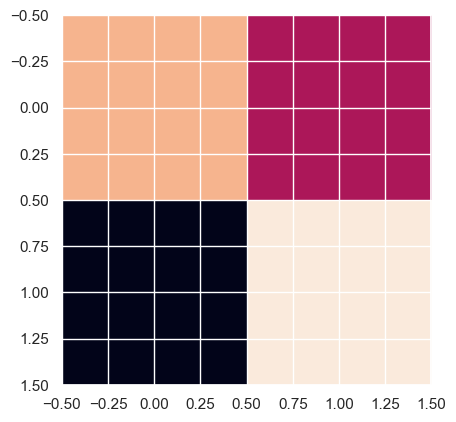

In [93]:
s2_confusion_matrix = np.zeros((2, 2))

# TODO
totalT = len(s2_test_features)
for i in range(0,totalT):
    preLa = s2_infer_class(s2_test_features[i])
    trueLa = s2_test_labels[i]
    s2_confusion_matrix[preLa,trueLa] +=1

# Don't modify
print(s2_confusion_matrix)
plt.imshow(s2_confusion_matrix)  # Plot heatmap of confusion_matrix

**b)** Compute the accuracy

In [94]:
s2_acc = 0
totalData = len(s2_test_labels)
for i in range(0,2):
    s2_acc +=  s2_confusion_matrix[i,i]
s2_acc = s2_acc/totalData

# TODO
s2_acc

0.75

**Does this accuracy align with what you expected based off how well (or not well) the data fits normal distributions?** (Note: Don't write the answer)  

# \[Optional for Bonus Marks] Section 3 - Harry Potter Classification

We will now look at a more challenging text-based classification problem, namely to classify a page from a Harry Potter book into which of the seven books the page was taken from. The books can be found in the zip file hp books.zip and are text files where each page of a given book is a line in the text file. Note, all punctuation and capital letters have been removed from the file, so that only the words of the page remain to be used by our model.

**Note:** Add and use mutliple code cells for each question to improve readibility.

## Question 1
Train an NB model using 80% of the data to train and the remaining 20% as test data. Use Laplace smoothing for your model. Report a confusion matrix of your results. Laplace smoothing is a simple way of avoiding 0 values in the class-conditional models (table of likelihoods). However, it may cause problems when many unique, infrequent words are added to the table (when multiplied together low likelihoods may still become 0 but too large a smoothing value will bias the model). In such a case even removing stop words* may not be enough. Thus, we will now smooth the table of likelihoods by adding a set value to each element of the table. The smoothing value used will now become a hyper-parameter for our algorithm, and so we will need to use a validation data set to find the correct value for the hyper-parameter.

*stop words are 'unhelpful' frequent words such as 'and', 'the', 'at' and so on that are often removed from the data to improve performance.

## Question 2

**a)** Adapt your code to use 80% of the data to train, 10% of the data as validation data and the remaining 10% as test data. Train separate NB classifiers using the values {$1 \times 10^{-1}$, $1 \times 10^{-2}$, $1 \times 10^{-3}$, $1 \times 10^{-4}$, $1 \times 10^{-5}$, $1 \times 10^{-6}$} to smooth the table of likelihoods. Train each model using the training data, and track its performance on the validation data.

**b)** Which model gave the best accuracy on validation data? 

TODO: Your answer here

**c)** Does the choice of smoothing value have a big impact on the performance of the model?

TODO: Your answer here

## Question 3

Use the model which achieved the best validation accuracy and test it using the test data set. Report a confusion matrix of the results, as well as the test accuracy of the model.

## Question 4

Looking at the confusion matrix, which books would you say are most similar to each other (hint: look at which books are often confused with each other)? Do you think JK Rowling's writing style changed over time? Why else do you think certain books are more easily confused with each other?

TODO: Your answer here

# END